## Графики

In [45]:
import sympy as sym
import numpy as np
def get_func(n):
    x = sym.Symbol('x');
    f = x**2+x+4*sym.cos(x)-4
    return sym.lambdify(x,sym.diff(f,x,n),"sympy");
func0 = [get_func(n) for n in range(0,3)]
func = [lambda x : x**2+x+4*np.cos(x)-4,lambda x: 2*x+1-4*np.sin(x),lambda x: 2-4*np.cos(x)]
exact = -3.3562551339197642716

<IPython.core.display.Javascript object>


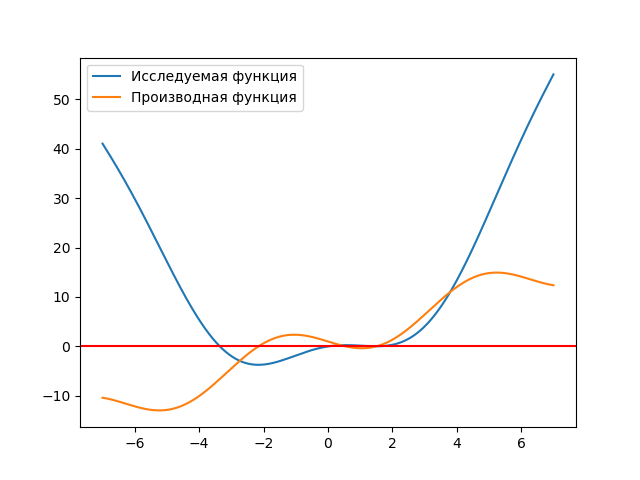

In [11]:
%matplotlib notebook
%config InlineBackend.figure_format = 'svg'

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-7,7,1000)
f = [func[0](t) for t in x]
f1= [func[1](t) for t in x]
plt.plot(x, f, label="Исследуемая функция")
plt.plot(x, f1, label="Производная функция")
plt.axhline(0, color='red')
plt.legend()

## Метод Чебышева

In [38]:
def iter_ch(f, x):
    return x - f[0](x)/f[1](x) - f[2](x)*(f[0](x))**2/(2*(f[1](x))**3)
def process_ch(f, x0 , eps = 10, max_steps = 20):
    steps = [x0]
    steps.append(iter(f,steps[-1]))
    while abs(steps[-1] - steps[-2]) > 10**(-eps):
        steps.append(iter_ch(f,steps[-1]))
    return steps;

# Метод секущих

In [39]:
def iter_s(f, steps):
    x0 = steps[-1]
    x1 = steps[-2]
    return x0 - f[0](x0) * (x1-x0) /(f[0](x1)-f[0](x0))

def process_s(f, x0, x1, eps = 10, max_steps = 20):
    steps = [x0, x1]
    while abs(steps[-1] - steps[-2]) > 10**(-eps):
        steps.append(iter_s(f,steps))
    return steps

In [49]:
from IPython.display import HTML, display
import tabulate

cheb = process_ch(func,-4)
sek = process_s(func,-3,-4)
length = 10
cheb_e = [exact - i for i in cheb]
sek_e = [exact - i for i in sek]
for i in range(len(cheb),len(sek)):
    cheb.append(0)
    cheb_e.append(0)
N = [i for i in range(0,length)]

table = list(zip(N,cheb,sek,cheb_e,sek_e))
display(HTML(tabulate.tabulate(table,headers = ["N","Метод Чебышева", "Метод Секущих","ErrorCh","ErrorS"], tablefmt='html',floatfmt=".12f")))
print(exact)

N,Метод Чебышева,Метод Секущих,ErrorCh,ErrorS
0,-4.000000000000,-3.000000000000,0.643744866080,-0.356255133920
1,-3.396544326735,-4.000000000000,0.040289192815,0.643744866080
2,-3.356280888083,-3.266829741927,0.000025754164,-0.089425391993
3,-3.356255133920,-3.336258349989,0.000000000000,-0.019996783931
4,-3.356255133920,-3.357105671019,0.000000000000,0.000850537099
5,0.000000000000,-3.356247406703,0.000000000000,-0.000007727217
6,0.000000000000,-3.356255130963,0.000000000000,-0.000000002956
7,0.000000000000,-3.356255133920,0.000000000000,0.000000000000
8,0.000000000000,-3.356255133920,0.000000000000,0.000000000000


-3.356255133919764
